✅ Libraries imported and models folder is ready.
Train shape: (736, 22), Validation shape: (158, 22), Test shape: (158, 22)
Features count: 20
[0]	validation_0-rmse:14.09748
[1]	validation_0-rmse:13.94891
[2]	validation_0-rmse:13.85967
[3]	validation_0-rmse:13.83804
[4]	validation_0-rmse:13.69658
[5]	validation_0-rmse:13.56489
[6]	validation_0-rmse:13.48244
[7]	validation_0-rmse:13.43099
[8]	validation_0-rmse:13.32935
[9]	validation_0-rmse:13.33824
[10]	validation_0-rmse:13.38996
[11]	validation_0-rmse:13.43650
[12]	validation_0-rmse:13.44834
[13]	validation_0-rmse:13.42462
[14]	validation_0-rmse:13.41228
[15]	validation_0-rmse:13.33375
[16]	validation_0-rmse:13.27081
[17]	validation_0-rmse:13.20549
[18]	validation_0-rmse:13.19940
[19]	validation_0-rmse:13.25738
[20]	validation_0-rmse:13.29065
[21]	validation_0-rmse:13.28208
[22]	validation_0-rmse:13.31588
[23]	validation_0-rmse:13.31584
[24]	validation_0-rmse:13.30806
[25]	validation_0-rmse:13.33782
[26]	validation_0-rmse:13.34829
[27

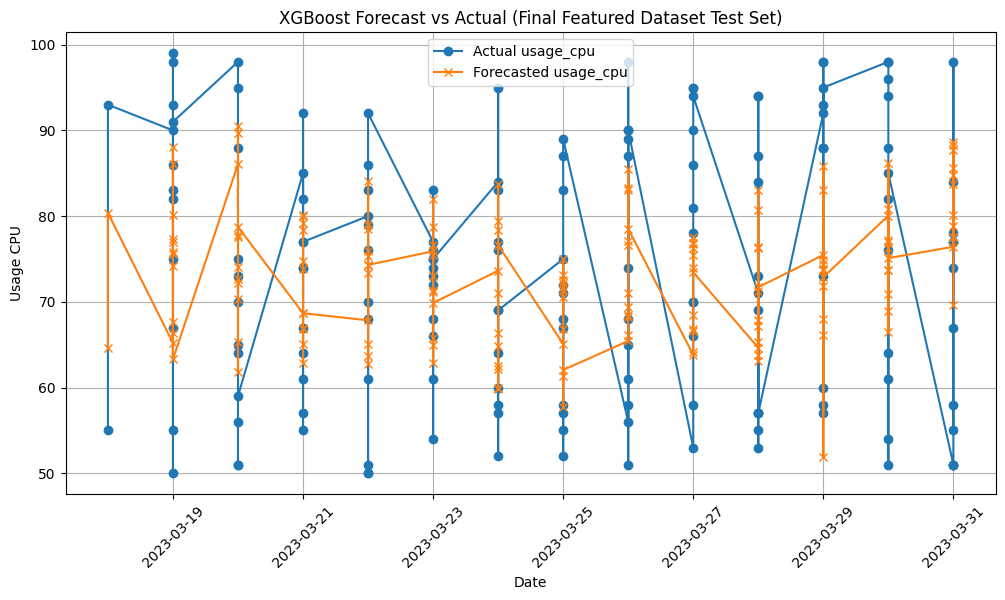

In [7]:
import pandas as pd
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import os

if not os.path.exists('latest_models'):
    os.makedirs('models')

print("✅ Libraries imported and models folder is ready.")

# Load dataset
df = pd.read_csv('D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/final_featured_dataset.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort by date (optional but good practice for time series)
df = df.sort_values('date').reset_index(drop=True)

df['usage_cpu_roll7'] = pd.to_numeric(df['usage_cpu_roll7'], errors='coerce')


# Split dataset into train, val, test by date or ratio
# Example: 70% train, 15% val, 15% test split by index (time based split is recommended)
total_len = len(df)
train_end = int(total_len * 0.7)
val_end = int(total_len * 0.85)

train_data = df.iloc[:train_end]
val_data = df.iloc[train_end:val_end]
test_data = df.iloc[val_end:]

print(f"Train shape: {train_data.shape}, Validation shape: {val_data.shape}, Test shape: {test_data.shape}")

# Features and target - excluding 'date' and 'usage_cpu' (target)
features = [col for col in df.columns if col not in ['date', 'usage_cpu']]

X_train = train_data[features]
y_train = train_data['usage_cpu']

X_val = val_data[features]
y_val = val_data['usage_cpu']

X_test = test_data[features]
y_test = test_data['usage_cpu']

print(f"Features count: {len(features)}")

# Train model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)
joblib.dump(xgb_model, 'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/notebooks/models/xgb_model_final_featured.pkl')
print("Model trained and saved.")

# Predict on test set
forecast_test = xgb_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data['date'], y_test.values, label='Actual usage_cpu', marker='o')
plt.plot(test_data['date'], forecast_test, label='Forecasted usage_cpu', marker='x')
plt.xlabel('Date')
plt.ylabel('Usage CPU')
plt.title('XGBoost Forecast vs Actual (Final Featured Dataset Test Set)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
forecast_test = xgb_model.predict(X_test)
forecast_test_series = pd.Series(forecast_test, index=test_agg['date'])

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test_agg['date'], y_test.values, label='Actual usage_cpu', marker='o')
plt.plot(test_agg['date'], forecast_test_series.values, label='Forecasted usage_cpu', marker='x')
plt.xlabel('Date')
plt.ylabel('Usage CPU')
plt.title('XGBoost Forecast vs Actual (Aggregated Test Set)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'test_agg' is not defined

In [ ]:
# === COMPLETE XGBOOST ML PIPELINE ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("=== COMPLETE XGBOOST ML PIPELINE ===")

# 1. DATA LOADING AND PREPROCESSING
print("\n1. DATA LOADING AND PREPROCESSING")
df = pd.read_csv('final_featured_dataset.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Fix the usage_cpu_roll7 column (convert to numeric)
df['usage_cpu_roll7'] = pd.to_numeric(df['usage_cpu_roll7'], errors='coerce')

# Handle missing values (fill with median for rolling average)
if df['usage_cpu_roll7'].isna().sum() > 0:
    df['usage_cpu_roll7'].fillna(df['usage_cpu_roll7'].median(), inplace=True)
    print(f"✓ Filled missing values in usage_cpu_roll7")

# Convert boolean columns to integers for XGBoost compatibility
bool_columns = ['is_weekend', 'region_North Europe', 'region_Southeast Asia', 
                'region_West US', 'resource_type_Storage', 'resource_type_VM']
for col in bool_columns:
    df[col] = df[col].astype(int)

print(f"✓ Dataset shape: {df.shape}")
print(f"✓ Target variable (usage_cpu) - Mean: {df['usage_cpu'].mean():.2f}, Std: {df['usage_cpu'].std():.2f}")

# 2. FEATURE SELECTION
print("\n2. FEATURE SELECTION")
features = [col for col in df.columns if col not in ['date', 'usage_cpu']]
X = df[features]
y = df['usage_cpu']

print(f"✓ Number of features: {len(features)}")
print(f"✓ Features: {features}")

# 3. TRAIN-VALIDATION-TEST SPLIT
print("\n3. TRAIN-VALIDATION-TEST SPLIT")
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Second split: separate train (64%) and validation (16%) from remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True
)

print(f"✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# 4. XGBOOST MODEL TRAINING
print("\n4. XGBOOST MODEL TRAINING")

# XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

# Train the model
model = xgb.XGBRegressor(**xgb_params)
model.fit(X_train, y_train)

print("✓ XGBoost model trained successfully")

# 5. MODEL PREDICTIONS
print("\n5. MODEL PREDICTIONS")
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("✓ Predictions generated for all datasets")

# 6. MODEL EVALUATION
print("\n6. MODEL EVALUATION")

def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Set Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on all datasets
train_metrics = evaluate_model(y_train, y_train_pred, "Training")
val_metrics = evaluate_model(y_val, y_val_pred, "Validation")
test_metrics = evaluate_model(y_test, y_test_pred, "Test")

# 7. FEATURE IMPORTANCE
print("\n7. FEATURE IMPORTANCE (Top 10)")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# 8. PREPARE DATA FOR VISUALIZATION
print("\n8. PREPARING VISUALIZATION DATA")

# Create a DataFrame for test results with original indices
test_results = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_test_pred,
    'residual': y_test.values - y_test_pred
})

# Add original dates for better visualization (using test indices)
test_dates = df.loc[y_test.index, 'date'].values
test_results['date'] = test_dates

# Sort by date for trend visualization
test_results = test_results.sort_values('date').reset_index(drop=True)

print(f"✓ Test results prepared with {len(test_results)} samples")
print(f"✓ Date range: {test_results['date'].min()} to {test_results['date'].max()}")

# Save results to CSV for further analysis
test_results.to_csv('xgboost_test_results.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

print("✓ Test results saved to 'xgboost_test_results.csv'")
print("✓ Feature importance saved to 'feature_importance.csv'")

print("\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
print(f"Final Test RMSE: {test_metrics['RMSE']:.4f}")
print(f"Final Test R²: {test_metrics['R2']:.4f}")


In [1]:
# === COMPLETE XGBOOST ML PIPELINE ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("=== COMPLETE XGBOOST ML PIPELINE ===")

# 1. DATA LOADING AND PREPROCESSING
print("\n1. DATA LOADING AND PREPROCESSING")
df = pd.read_csv('D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/data/processed/final_featured_dataset.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Fix the usage_cpu_roll7 column (convert to numeric)
df['usage_cpu_roll7'] = pd.to_numeric(df['usage_cpu_roll7'], errors='coerce')

# Handle missing values (fill with median for rolling average)
if df['usage_cpu_roll7'].isna().sum() > 0:
    df['usage_cpu_roll7'].fillna(df['usage_cpu_roll7'].median(), inplace=True)
    print(f"✓ Filled missing values in usage_cpu_roll7")

# Convert boolean columns to integers for XGBoost compatibility
bool_columns = ['is_weekend', 'region_North Europe', 'region_Southeast Asia', 
                'region_West US', 'resource_type_Storage', 'resource_type_VM']
for col in bool_columns:
    df[col] = df[col].astype(int)

print(f"✓ Dataset shape: {df.shape}")
print(f"✓ Target variable (usage_cpu) - Mean: {df['usage_cpu'].mean():.2f}, Std: {df['usage_cpu'].std():.2f}")

# 2. FEATURE SELECTION
print("\n2. FEATURE SELECTION")
features = [col for col in df.columns if col not in ['date', 'usage_cpu']]
X = df[features]
y = df['usage_cpu']

print(f"✓ Number of features: {len(features)}")
print(f"✓ Features: {features}")

# 3. TRAIN-VALIDATION-TEST SPLIT
print("\n3. TRAIN-VALIDATION-TEST SPLIT")
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Second split: separate train (64%) and validation (16%) from remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True
)

print(f"✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# 4. XGBOOST MODEL TRAINING
print("\n4. XGBOOST MODEL TRAINING")

# XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

# Train the model
model = xgb.XGBRegressor(**xgb_params)
model.fit(X_train, y_train)

print("✓ XGBoost model trained successfully")

# 5. MODEL PREDICTIONS
print("\n5. MODEL PREDICTIONS")
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("✓ Predictions generated for all datasets")

# 6. MODEL EVALUATION
print("\n6. MODEL EVALUATION")

def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Set Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on all datasets
train_metrics = evaluate_model(y_train, y_train_pred, "Training")
val_metrics = evaluate_model(y_val, y_val_pred, "Validation")
test_metrics = evaluate_model(y_test, y_test_pred, "Test")

# 7. FEATURE IMPORTANCE
print("\n7. FEATURE IMPORTANCE (Top 10)")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# 8. PREPARE DATA FOR VISUALIZATION
print("\n8. PREPARING VISUALIZATION DATA")

# Create a DataFrame for test results with original indices
test_results = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_test_pred,
    'residual': y_test.values - y_test_pred
})

# Add original dates for better visualization (using test indices)
test_dates = df.loc[y_test.index, 'date'].values
test_results['date'] = test_dates

# Sort by date for trend visualization
test_results = test_results.sort_values('date').reset_index(drop=True)

print(f"✓ Test results prepared with {len(test_results)} samples")
print(f"✓ Date range: {test_results['date'].min()} to {test_results['date'].max()}")

# Save results to CSV for further analysis
test_results.to_csv('xgboost_test_results.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

print("✓ Test results saved to 'xgboost_test_results.csv'")
print("✓ Feature importance saved to 'feature_importance.csv'")

print("\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
print(f"Final Test RMSE: {test_metrics['RMSE']:.4f}")
print(f"Final Test R²: {test_metrics['R2']:.4f}")


=== COMPLETE XGBOOST ML PIPELINE ===

1. DATA LOADING AND PREPROCESSING
✓ Filled missing values in usage_cpu_roll7
✓ Dataset shape: (1052, 22)
✓ Target variable (usage_cpu) - Mean: 74.67, Std: 14.50

2. FEATURE SELECTION
✓ Number of features: 20
✓ Features: ['usage_storage', 'users_active', 'economic_index', 'cloud_market_demand', 'holiday', 'month', 'quarter', 'weekofyear', 'is_weekend', 'usage_cpu_lag1', 'usage_cpu_lag7', 'users_active_lag1', 'users_active_lag7', 'usage_cpu_roll7', 'users_active_roll7', 'region_North Europe', 'region_Southeast Asia', 'region_West US', 'resource_type_Storage', 'resource_type_VM']

3. TRAIN-VALIDATION-TEST SPLIT
✓ Training set: 672 samples (63.9%)
✓ Validation set: 169 samples (16.1%)
✓ Test set: 211 samples (20.1%)

4. XGBOOST MODEL TRAINING
✓ XGBoost model trained successfully

5. MODEL PREDICTIONS
✓ Predictions generated for all datasets

6. MODEL EVALUATION

Training Set Metrics:
  RMSE: 2.2636
  MAE:  1.7126
  R²:   0.9759

Validation Set Metrics: